# Phase I

***Dataset and the associated description of the data***

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('agaricus-lepiota.csv')

In [3]:
data.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [4]:
data.shape

(8123, 23)

The data set has 8123 samples, each sample has 22 variables and a label. The first column is the label column: e-edible, p-poisonous, the others are:
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

***Create a pandas DataFrame with a subset of the columns in the dataset.***

In [5]:
df = data[['p','n','p.1','s.3']]

***Add meaningful names for each column***

In [6]:
df = df.rename(columns={'p':'poisonous','n':'cap-color','p.1':'odor','s.3':'population'}) 
df.head()

,poisonous,cap-color,odor,population
0,e,y,a,n
1,e,w,l,n
2,p,w,p,s
3,e,g,n,a
4,e,y,a,n


***Convert label value and Create dummy variables***

In [7]:
data = df
df.loc[df['poisonous']=='e', 'poisonous'] = 0
df.loc[df['poisonous']=='p', 'poisonous'] = 1

In [8]:
for each in ['cap-color', 'odor', 'population']:
    dummies = pd.get_dummies(df.loc[:, each], prefix=each) 
    df = pd.concat([df, dummies], axis = 1)
df = df.drop(['cap-color', 'odor', 'population'], axis = 1)
df.head()

,poisonous,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,...,odor_n,odor_p,odor_s,odor_y,population_a,population_c,population_n,population_s,population_v,population_y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


***Perform exploratory data analysis***

Show the distribution of data for each of the columns

In [9]:
#df1 = data
data['cap-color'].value_counts()

n    2283
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

In [10]:
data['odor'].value_counts()

n    3528
f    2160
s     576
y     576
a     400
l     400
p     255
c     192
m      36
Name: odor, dtype: int64

In [11]:
data['population'].value_counts()

v    4040
y    1712
s    1247
n     400
a     384
c     340
Name: population, dtype: int64

edible/poisonous vs. odor

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
n0 = data.loc[(data['poisonous']==0) & (data['odor']=='n')].shape[0]
f0 = data.loc[(data['poisonous']==0) & (data['odor']=='f')].shape[0]
y0 = data.loc[(data['poisonous']==0) & (data['odor']=='y')].shape[0]
s0 = data.loc[(data['poisonous']==0) & (data['odor']=='s')].shape[0]
l0 = data.loc[(data['poisonous']==0) & (data['odor']=='l')].shape[0]
a0 = data.loc[(data['poisonous']==0) & (data['odor']=='a')].shape[0]
p0 = data.loc[(data['poisonous']==0) & (data['odor']=='p')].shape[0]
c0 = data.loc[(data['poisonous']==0) & (data['odor']=='c')].shape[0]
m0 = data.loc[(data['poisonous']==0) & (data['odor']=='m')].shape[0]
n1 = data.loc[(data['poisonous']==1) & (data['odor']=='n')].shape[0]
f1 = data.loc[(data['poisonous']==1) & (data['odor']=='f')].shape[0]
y1 = data.loc[(data['poisonous']==1) & (data['odor']=='y')].shape[0]
s1 = data.loc[(data['poisonous']==1) & (data['odor']=='s')].shape[0]
l1 = data.loc[(data['poisonous']==1) & (data['odor']=='l')].shape[0]
a1 = data.loc[(data['poisonous']==1) & (data['odor']=='a')].shape[0]
p1 = data.loc[(data['poisonous']==1) & (data['odor']=='p')].shape[0]
c1 = data.loc[(data['poisonous']==1) & (data['odor']=='c')].shape[0]
m1 = data.loc[(data['poisonous']==1) & (data['odor']=='m')].shape[0]
#plt.bar([1, 3, 5, 7, 9, 11, 13, 15, 17], [n0, f0, y0, s0, l0, a0, p0, c0, m0], label='edible')
#plt.bar([2, 4, 6, 8, 10, 12, 14, 16, 18], [n1, f1, y1, s1, l1, a1, p1, c1, m1], label='poisonous')
#plt.show()

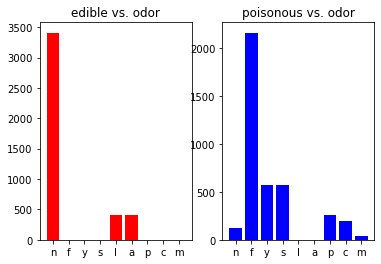

In [14]:
plt.subplot(121)
plt.bar(['n', 'f', 'y', 's', 'l', 'a', 'p', 'c', 'm'], [n0, f0, y0, s0, l0, a0, p0, c0, m0], color='r')
plt.title('edible vs. odor')
plt.subplot(122)
plt.bar(['n', 'f', 'y', 's', 'l', 'a', 'p', 'c', 'm'], [n1, f1, y1, s1, l1, a1, p1, c1, m1], color='b')
plt.title('poisonous vs. odor')
plt.show()

As can be seen from the above figure, the odor of mushrooms can distinguish most mushrooms are poisonous or edible.

# Phase II

***Building The Decision Tree model***  
Use cap-color to predict whether mushrooms are edible or poisonous

In [15]:
from sklearn import tree
from sklearn.model_selection import train_test_split
clf = tree.DecisionTreeClassifier()

x = np.array(df.drop(['poisonous', 'odor_a', 'odor_c',
       'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p', 'odor_s',
       'odor_y', 'population_a', 'population_c', 'population_n',
       'population_s', 'population_v', 'population_y'], axis = 1))
y = np.array(df['poisonous']).T

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
clf = clf.fit(X_train,y_train.astype('int'))
print('Accuracy & cap-color:', clf.score(X_test, y_test.astype('int')))

Accuracy & cap-color: 0.6043076923076923


Use odor to predict whether mushrooms are edible or poisonous

In [16]:
x = np.array(df.drop(['poisonous', 'cap-color_b', 'cap-color_c', 'cap-color_e',
       'cap-color_g', 'cap-color_n', 'cap-color_p', 'cap-color_r',
       'cap-color_u', 'cap-color_w', 'cap-color_y', 'population_a', 'population_c', 'population_n',
       'population_s', 'population_v', 'population_y'], axis = 1))
y = np.array(df['poisonous']).T

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
clf = clf.fit(X_train,y_train.astype('int'))
print('Accuracy & odor:', clf.score(X_test, y_test.astype('int')))

Accuracy & odor: 0.984


Use population to predict whether mushrooms are edible or poisonous

In [17]:
x = np.array(df.drop(['poisonous', 'cap-color_b', 'cap-color_c', 'cap-color_e',
       'cap-color_g', 'cap-color_n', 'cap-color_p', 'cap-color_r',
       'cap-color_u', 'cap-color_w', 'cap-color_y', 'odor_a', 'odor_c',
       'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p', 'odor_s',
       'odor_y'], axis = 1))
y = np.array(df['poisonous']).T

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
clf = clf.fit(X_train,y_train.astype('int'))
print('Accuracy & population:', clf.score(X_test, y_test.astype('int')))

Accuracy & population: 0.7236923076923077


It can be seen from the above results that using odor to predict whether mushrooms are edible or poisonous is obviously much better, it is the best.

***Recommendations for further analysis***  
Making predictions using three attributes of mushrooms

In [18]:
x = np.array(df.drop(['poisonous'], axis = 1))
y = np.array(df['poisonous']).T
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
clf = clf.fit(X_train,y_train.astype('int'))
print('Accuracy:', clf.score(X_test, y_test.astype('int')))

Accuracy: 0.9981538461538462


You can see that the accuracy of the prediction is further improved。